In [ ]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

#warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#load data
data = pd.read_csv("/content/DS_DATA.csv")

In [ ]:
#rows,columns
data.shape

(12684, 25)

In [ ]:
#sample
data.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [ ]:
#Target column exploration
target_col = 'Accept(Y/N?)'
print(data[target_col].value_counts())

Accept(Y/N?)
1    7210
0    5474
Name: count, dtype: int64


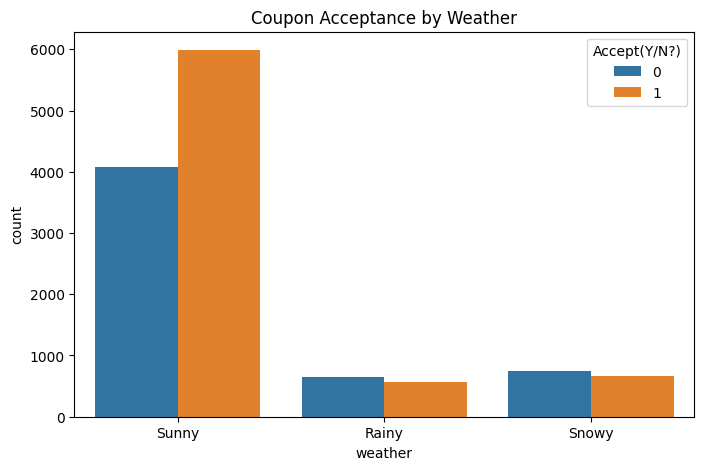

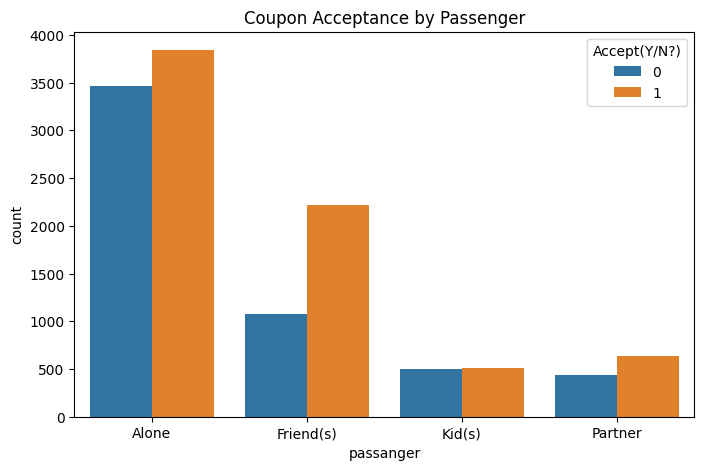

In [ ]:
# Comparison of coupon acceptance rates

if 'weather' in data.columns:
    plt.figure(figsize=(8,5))
    sns.countplot(x='weather', hue=target_col, data=data)
    plt.title("Coupon Acceptance by Weather")
    plt.show()

if 'passanger' in data.columns:
    plt.figure(figsize=(8,5))
    sns.countplot(x='passanger', hue=target_col, data=data)
    plt.title("Coupon Acceptance by Passenger")
    plt.show()

In [ ]:
#missing values
print("\nMissing Values per Column:")
print(data.isnull().sum())
print("\nTotal Missing Values:", data.isnull().sum().sum())


Missing Values per Column:
destination                 0
passanger                   0
weather                     0
temperature                 0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Accept(Y/N?)                0
dtype: int64

Total Missing Values: 13370


In [ ]:
#drop irrelevant cloumns
data = data.drop(columns=['car'])

In [ ]:
#filling missing values
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].fillna(data[col].mode()[0])
    else:
        data[col] = data[col].fillna(data[col].median())



In [ ]:
print("\nAfter Cleaning - Missing Values Check:")
print(data.isnull().sum().sum())


After Cleaning - Missing Values Check:
0


In [ ]:
#encoding

le = LabelEncoder()
data[data.select_dtypes(include='object').columns] = data.select_dtypes(include='object').apply(le.fit_transform)

data.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,1,0,2,55,4,0,0,0,3,1,...,4,0,1,0,1,0,0,0,1,1
1,1,1,2,80,2,1,0,0,3,1,...,4,0,1,0,1,0,0,0,1,0
2,1,1,2,80,1,1,0,0,3,1,...,4,0,1,0,1,1,0,0,1,1
3,1,1,2,80,2,1,0,0,3,1,...,4,0,1,0,1,1,0,0,1,0
4,1,1,2,80,2,0,0,0,3,1,...,4,0,1,0,1,1,0,0,1,0


In [ ]:
#train test split
target_col = "Accept(Y/N?)"
X = data.drop(columns=[(target_col)])
y = data[(target_col)]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nFeature Scaling Complete:")
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)



Feature Scaling Complete:
Training data shape: (10147, 23)
Testing data shape: (2537, 23)


In [ ]:
#model training

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss')
}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    scores_percent = scores * 100
    mean_score = scores_percent.mean()
    std_score = scores_percent.std()
    print(f"{name}: {mean_score:.2f}% (+/- {std_score:.2f}%)")

Logistic Regression: 62.21% (+/- 0.97%)
Random Forest: 73.49% (+/- 1.32%)
Decision Tree: 67.34% (+/- 0.61%)
Gradient Boosting: 72.02% (+/- 1.46%)
XGBoost: 75.01% (+/- 0.82%)


In [ ]:
#best model

best_model = XGBClassifier(eval_metric='logloss', random_state=42)
best_model.fit(X_train, y_train)

#evaluate
y_pred = best_model.predict(X_test)

print("\nFinal Model Evaluation (XGBoost):")
print(classification_report(y_test, y_pred))
print("Accuracy:", round(accuracy_score(y_test, y_pred),2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Final Model Evaluation (XGBoost):
              precision    recall  f1-score   support

           0       0.73      0.68      0.70      1128
           1       0.76      0.80      0.78      1409

    accuracy                           0.75      2537
   macro avg       0.74      0.74      0.74      2537
weighted avg       0.75      0.75      0.74      2537

Accuracy: 0.75

Confusion Matrix:
 [[ 764  364]
 [ 280 1129]]


In [ ]:
#Feature importance

feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": best_model.feature_importances_ * 100
})

feature_importance = feature_importance.sort_values(by="Importance", ascending=False)
feature_importance["Importance"] = feature_importance["Importance"].round(2)

print("Top 10 Important Features (in %):")
print(feature_importance.head(10))


Top 10 Important Features (in %):
              Feature  Importance
20  toCoupon_GEQ25min        9.30
4              coupon        8.76
5          expiration        6.90
14        CoffeeHouse        6.45
13                Bar        6.12
2             weather        4.62
0         destination        4.55
6              gender        4.49
8       maritalStatus        4.31
1           passanger        4.07


ROC–AUC Score: 82.59


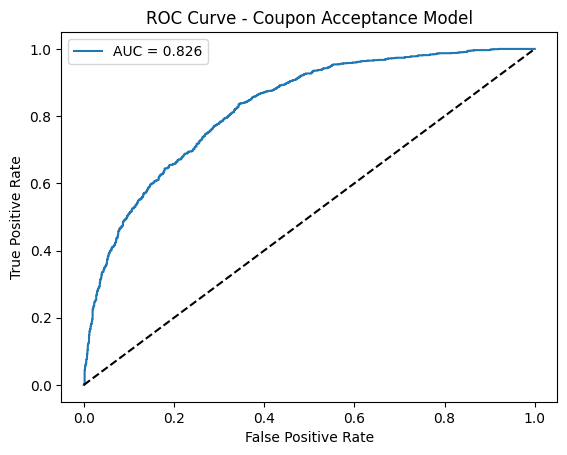

In [ ]:
#predicting probaiblty for positive class
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# compute ROC–AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC–AUC Score: {roc_auc*100:.2f}")

# plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Coupon Acceptance Model')
plt.legend()
plt.show()